In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# create random data matrix (1000 samples x 100 features)
random_matrix = np.random.rand(100,1000) 
# make random matrix zero-mean dataset
n = random_matrix.mean(axis=0)
matrix = random_matrix-n

In [23]:
# get covariance matrix of the matrix
cov_matrix = np.cov(matrix)

In [24]:
# calculate eigenvalue and its corresponding eigenvector of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_matrix)

In [25]:
# sort eig_val and eig_vec according to size of eigenvalue (in decreasing order)
idx = eig_val.argsort()
eigval_sorted = eig_val[idx][::-1]
eigvec_sorted = eig_vec[:,idx][::-1]

In [30]:
# find out explained variance of each eigenvalue
variance = [i/sum(eigval_sorted)*100 for i in eigval_sorted]

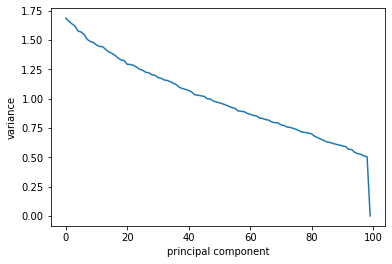

In [34]:
# draw chart: Y-axis variance of principal components X-axis principal components
x = [i for i in range(matrix.shape[0])]
plt.plot(x,variance)
# name each axes
plt.xlabel('principal component')
plt.ylabel('variance')
plt.show()

In [ ]:
# find out cumulative sum of variances of eigenvalue
# this shows how much variance we will have when including each eigenvalue
cum_var = np.cumsum(variance)

In [ ]:
# determine number of components to be reduced in pca

var = 95 # this is a limit. Include components whose cumulative variance are up to 95
n = 0 # number of components to be included

for i in range(len(cum_var)):
    if cum_var<=95:
        continue;
    else: 
        n = i+1
        break;

eigvec_sorted = eigvec_sorted[:,:n]  # choose first n components 

In [44]:
# perform pca
new_matrix = np.array(np.random.rand(100,1000))
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[0]):
        if j==0:
            new = matrix[:,i] * eigvec_sorted[j,:]
        else:
            np.add(new, matrix[:,i] * eigvec_sorted[j,:]) 

    new_matrix[:,i] = new

print(new_matrix)

[[-0.02823281  0.01139993 -0.04587694 ... -0.01472936 -0.0281107
  -0.00934051]
 [ 0.07856309 -0.01918377 -0.03212516 ...  0.00204971 -0.04827489
   0.00858989]
 [ 0.01023758 -0.00976888 -0.00850476 ...  0.01212485 -0.03254224
  -0.02075383]
 ...
 [ 0.01100973 -0.00364036 -0.05858627 ...  0.00718315  0.04968855
  -0.04001105]
 [-0.00736428  0.00387616 -0.00642733 ...  0.01435565  0.01312593
  -0.0159567 ]
 [-0.01805142 -0.04783188  0.05201374 ...  0.02242139  0.03069618
   0.00112497]]
